## Imports and reading in the csv

In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import scipy.stats as stats
import math
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import ensemble
from sklearn.utils import shuffle
from sklearn.model_selection import cross_val_score
pd.set_option('display.max_colwidth', None)



In [5]:
df_train = pd.read_csv('train_house_price.csv')
df_test = pd.read_csv('test.csv')
dependentVariable = df_train['SalePrice']

print(df_train.to_string(line_width=60))

        Id  MSSubClass MSZoning  LotFrontage  LotArea  \
0        1          60       RL         65.0     8450   
1        2          20       RL         80.0     9600   
2        3          60       RL         68.0    11250   
3        4          70       RL         60.0     9550   
4        5          60       RL         84.0    14260   
5        6          50       RL         85.0    14115   
6        7          20       RL         75.0    10084   
7        8          60       RL          NaN    10382   
8        9          50       RM         51.0     6120   
9       10         190       RL         50.0     7420   
10      11          20       RL         70.0    11200   
11      12          60       RL         85.0    11924   
12      13          20       RL          NaN    12968   
13      14          20       RL         91.0    10652   
14      15          20       RL          NaN    10920   
15      16          45       RM         51.0     6120   
16      17          20       RL

## Create at least one feature from the data set.


In [6]:
df_train['LivingLotAreaRatio'] = df_train.GrLivArea / df_train.LotArea

## Conduct EDA and provide appropriate visualizations in the process.

In [7]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LivingLotAreaRatio
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,0.202367
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,0.131458
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,0.158756
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,0.179791
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,0.154137


There are a lot of missing values in certain features - 
we must filter or clean the data so then we can begin modeling

In [8]:
print(df_train.describe())

                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ..

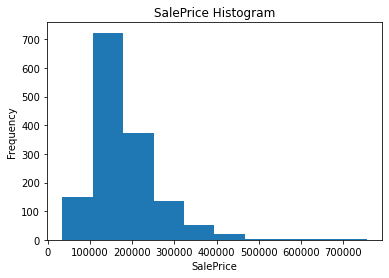

In [9]:
# testing normality - fairly normal 
plt.hist(dependentVariable)
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.title('SalePrice Histogram')
plt.show()

In [10]:
# Some possible features we can use to help train on
# Using spearman correlation to leverage the ranking system
correlations = df_train.corr(method='spearman')\
['SalePrice'].sort_values(ascending=True)
correlations_abs = correlations.abs()
# showing low correlated features with SalePrice so we know to remove them
print('\nLow correlations (absolute):\n', correlations_abs.head(35))


Low correlations (absolute):
 EnclosedPorch         0.218394
KitchenAbvGr          0.164826
OverallCond           0.129325
LowQualFinSF          0.067719
MiscVal               0.062727
BsmtFinSF2            0.038806
YrSold                0.029899
Id                    0.018546
BsmtHalfBath          0.012189
MSSubClass            0.007192
PoolArea              0.058453
3SsnPorch             0.065440
MoSold                0.069432
ScreenPorch           0.100070
BsmtUnfSF             0.185197
LivingLotAreaRatio    0.197813
BsmtFullBath          0.225125
BedroomAbvGr          0.234907
2ndFlrSF              0.293598
BsmtFinSF1            0.301871
HalfBath              0.343008
WoodDeckSF            0.353802
LotFrontage           0.409076
MasVnrArea            0.421309
LotArea               0.456461
OpenPorchSF           0.477561
Fireplaces            0.519247
TotRmsAbvGrd          0.532586
YearRemodAdd          0.571159
1stFlrSF              0.575408
GarageYrBlt           0.593788
TotalBsm

In [11]:
# in order to clean our data, we drop the uneccesary features that were 
# determined above (less than 0.3) 
# as well as duplicated features or unneccessary ones for training such as 'Id'
# Sadly the feature we created was deemed not as relevent as the others, 
#thus we removed it


train_data = df_train[['LotFrontage', 'OverallQual', 'YearBuilt', 'YearRemodAdd',
        'MasVnrArea', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 
        'GrLivArea',
       'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'SalePrice']]

test_data = df_test[['LotFrontage', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 
        'MasVnrArea','BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 
        'GrLivArea',
       'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF']]

## Data Cleaning & Pre-processing

In [12]:
# the amount of missing data
nullTotals = train_data.isnull().sum().sort_values(ascending = False) 
percentageOfNull = (train_data.isnull().sum() / df_train.isnull()
                    .count()).sort_values(ascending = False) 
emptyVals = pd.concat([nullTotals, percentageOfNull], axis=1, 
                      keys=['Total Missing Values', 'Percentage of Feature Specific Data that is Null'])
emptyVals.head(20)

,Total Missing Values,Percentage of Feature Specific Data that is Null
LotFrontage,259.0,0.177397
GarageYrBlt,81.0,0.055479
MasVnrArea,8.0,0.005479
FullBath,0.0,0.000000
OpenPorchSF,0.0,0.000000
WoodDeckSF,0.0,0.000000
GarageArea,0.0,0.000000
GarageCars,0.0,0.000000
Fireplaces,0.0,0.000000
TotRmsAbvGrd,0.0,0.000000


In [13]:
# deleting missing data that has more than 80% missing 
train_data = train_data.drop((emptyVals[emptyVals['Total Missing Values'] > 81]).index,1)

/var/folders/sz/wyddnfrs2pzfs3g11779b4g00000gn/T/ipykernel_32262/1755087760.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  train_data = train_data.drop((emptyVals[emptyVals['Total Missing Values'] > 81]).index,1)


In [14]:
# test data
nullTotals = test_data.isnull().sum().sort_values(ascending = False) 
percentageOfNull = (test_data.isnull().sum() / df_train.isnull().count())\
.sort_values(ascending = False) 
emptyVals = pd.concat([nullTotals, percentageOfNull], \
axis=1, keys=['Total_Missing_Values', 'Percentage of Feature Specific Data that is Null'])
emptyVals.head(20)

,Total_Missing_Values,Percentage of Feature Specific Data that is Null
LotFrontage,227.0,0.155479
GarageYrBlt,78.0,0.053425
MasVnrArea,15.0,0.010274
GarageArea,1.0,0.000685
BsmtFinSF1,1.0,0.000685
TotalBsmtSF,1.0,0.000685
GarageCars,1.0,0.000685
TotRmsAbvGrd,0.0,0.000000
WoodDeckSF,0.0,0.000000
Fireplaces,0.0,0.000000


In [15]:
# again dropping the features that contain A LOT of missing values 
test_data = test_data.drop((emptyVals[emptyVals['Total_Missing_Values'] > 78]).index,1)

/var/folders/sz/wyddnfrs2pzfs3g11779b4g00000gn/T/ipykernel_32262/138826562.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  test_data = test_data.drop((emptyVals[emptyVals['Total_Missing_Values'] > 78]).index,1)


In [16]:
# showing which features still need cleaning in both test and training data

print(train_data.isnull().sum().sort_values(ascending=False).head(20))
print('___________________\n')
print(test_data.isnull().sum().sort_values(ascending=False).head(20))

GarageYrBlt     81
MasVnrArea       8
OverallQual      0
TotRmsAbvGrd     0
OpenPorchSF      0
WoodDeckSF       0
GarageArea       0
GarageCars       0
Fireplaces       0
FullBath         0
YearBuilt        0
GrLivArea        0
2ndFlrSF         0
1stFlrSF         0
TotalBsmtSF      0
BsmtFinSF1       0
YearRemodAdd     0
SalePrice        0
dtype: int64
___________________

GarageYrBlt     78
MasVnrArea      15
BsmtFinSF1       1
TotalBsmtSF      1
GarageArea       1
GarageCars       1
OverallQual      0
TotRmsAbvGrd     0
WoodDeckSF       0
Fireplaces       0
GrLivArea        0
FullBath         0
YearBuilt        0
2ndFlrSF         0
1stFlrSF         0
YearRemodAdd     0
OpenPorchSF      0
dtype: int64


In [17]:
# replacing the possibly relevent features that have missing valus 
# with the mean of their respective columns
train_data['GarageYrBlt'] = train_data['GarageYrBlt'].fillna(train_data['GarageYrBlt'].mean())
train_data['MasVnrArea'] = train_data['MasVnrArea'].fillna(train_data['MasVnrArea'].mean())

In [18]:
test_data.isnull().sum().sort_values(ascending=False).head(20)

GarageYrBlt     78
MasVnrArea      15
BsmtFinSF1       1
TotalBsmtSF      1
GarageArea       1
GarageCars       1
OverallQual      0
TotRmsAbvGrd     0
WoodDeckSF       0
Fireplaces       0
GrLivArea        0
FullBath         0
YearBuilt        0
2ndFlrSF         0
1stFlrSF         0
YearRemodAdd     0
OpenPorchSF      0
dtype: int64

In [19]:
# replacing areas in the test data that are missing with their means
test_data['MasVnrArea'] = test_data['MasVnrArea'].fillna(test_data['MasVnrArea'].mean())
test_data['TotalBsmtSF'] = test_data['TotalBsmtSF'].fillna(test_data['TotalBsmtSF'].mean())
test_data['GarageArea'] = test_data['GarageArea'].fillna(test_data['GarageArea'].mean())
test_data['BsmtFinSF1'] = test_data['BsmtFinSF1'].fillna(test_data['BsmtFinSF1'].mean())
test_data['GarageYrBlt'] = test_data['GarageYrBlt'].fillna(test_data['GarageYrBlt'].mean())
test_data['GarageCars'] = test_data['GarageCars'].fillna(test_data['GarageCars'].mean())


OverallQual
<class 'str'>
<class 'numpy.int64'>


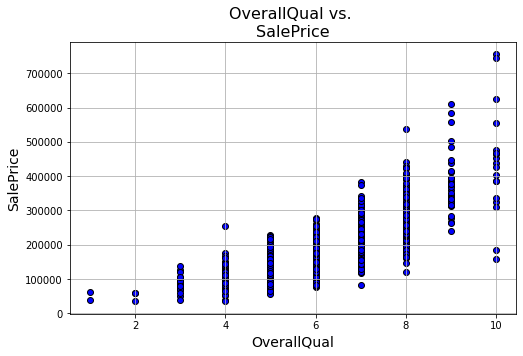

YearBuilt
<class 'str'>
<class 'numpy.int64'>


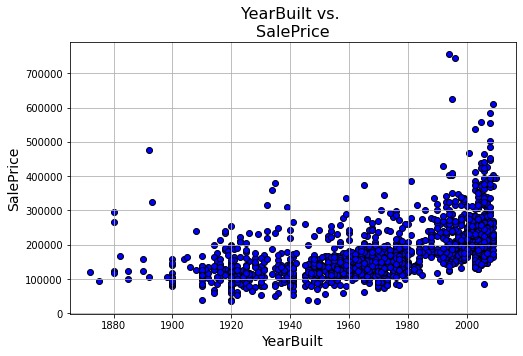

YearRemodAdd
<class 'str'>
<class 'numpy.int64'>


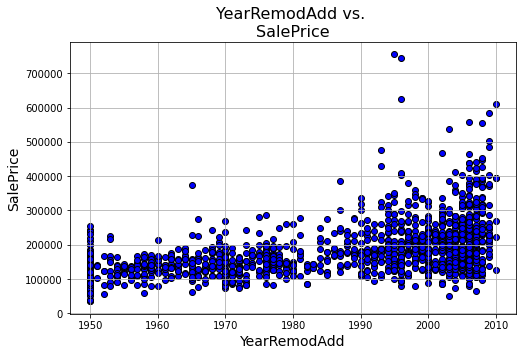

MasVnrArea
<class 'str'>
<class 'numpy.float64'>


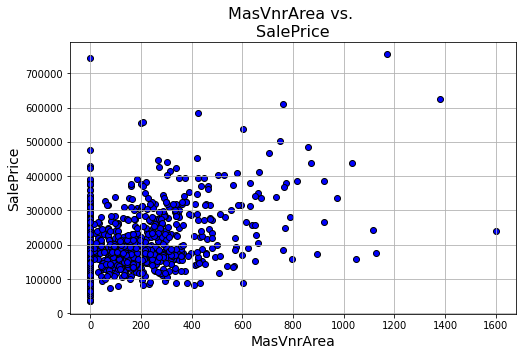

BsmtFinSF1
<class 'str'>
<class 'numpy.int64'>


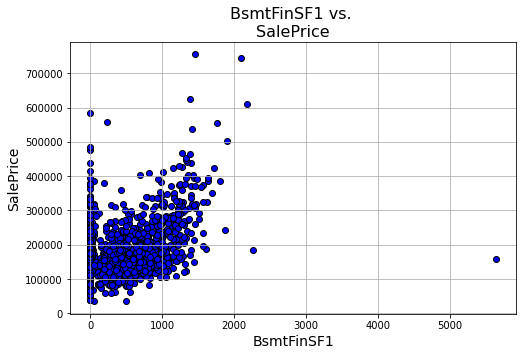

TotalBsmtSF
<class 'str'>
<class 'numpy.int64'>


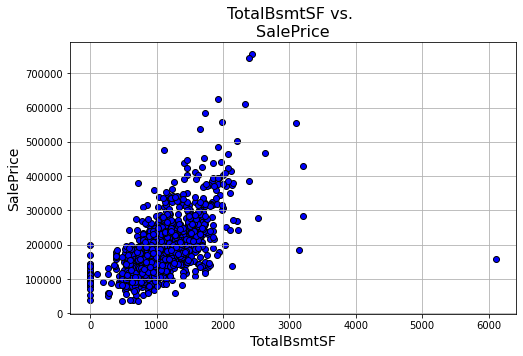

1stFlrSF
<class 'str'>
<class 'numpy.int64'>


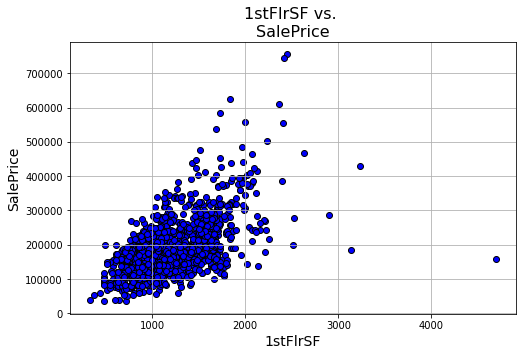

2ndFlrSF
<class 'str'>
<class 'numpy.int64'>


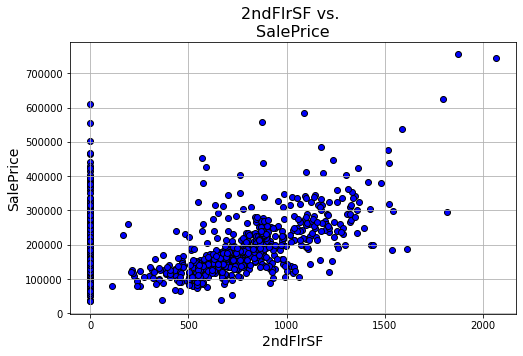

GrLivArea
<class 'str'>
<class 'numpy.int64'>


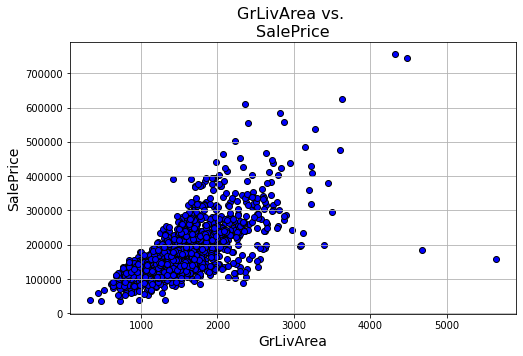

FullBath
<class 'str'>
<class 'numpy.int64'>


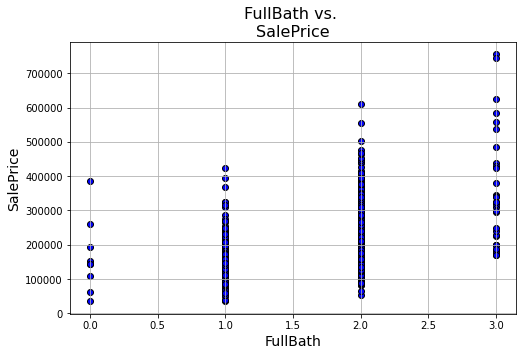

TotRmsAbvGrd
<class 'str'>
<class 'numpy.int64'>


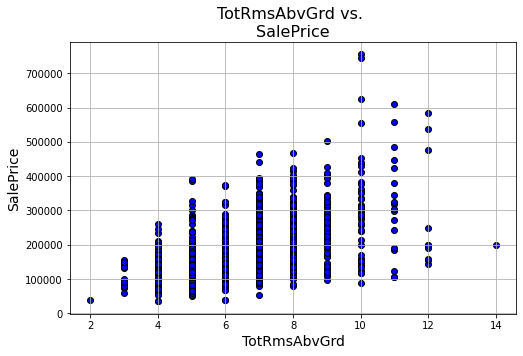

Fireplaces
<class 'str'>
<class 'numpy.int64'>


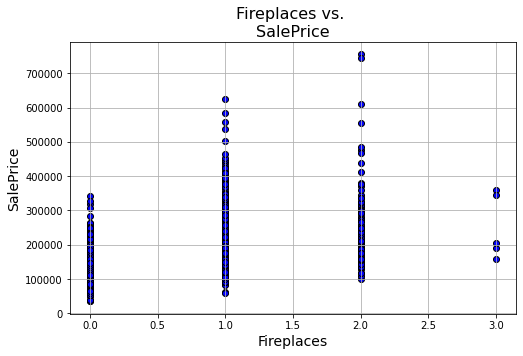

GarageYrBlt
<class 'str'>
<class 'numpy.float64'>


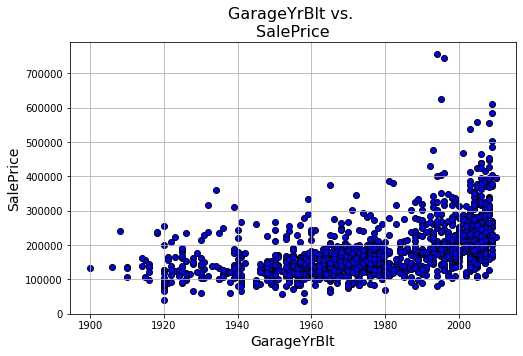

GarageCars
<class 'str'>
<class 'numpy.int64'>


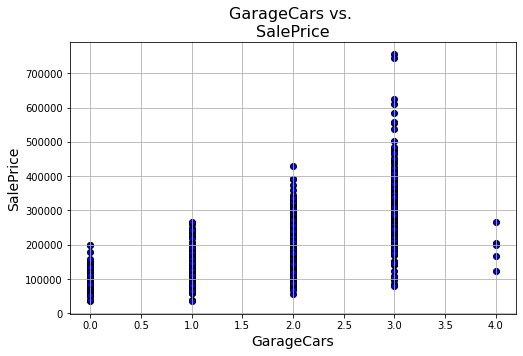

GarageArea
<class 'str'>
<class 'numpy.int64'>


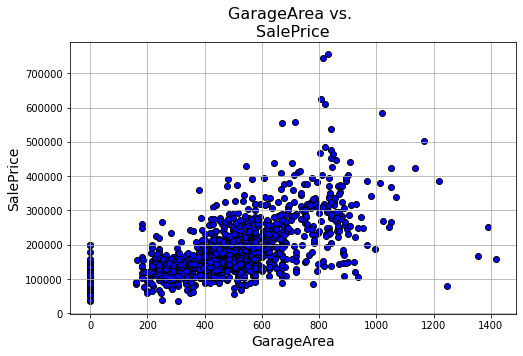

WoodDeckSF
<class 'str'>
<class 'numpy.int64'>


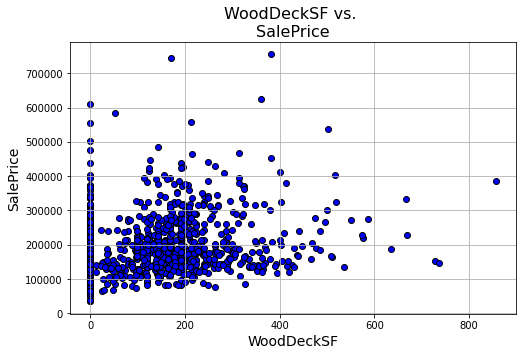

OpenPorchSF
<class 'str'>
<class 'numpy.int64'>


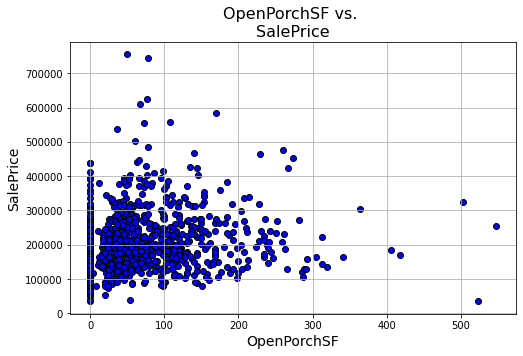

In [20]:
for c in train_data.columns[:-1]:
    
        plt.figure(figsize=(8,5))
        plt.title("{} vs. \nSalePrice".format(c),fontsize=16)
        print(c)
        print(type(c))
        print(df_train[c].dtype.type)
        #if df_train[c]. != 
        plt.scatter(x=df_train[c],y=df_train['SalePrice'],color='blue',edgecolor='k')
        plt.grid(True)
        plt.xlabel(c,fontsize=14)
        plt.ylabel('SalePrice',fontsize=14)
        plt.show()

Some of the features do not really offer a great idea or visualization between SalePrice and itself such as OpenPorchSf - we need to explore further to help understand the relevent features

## Build a minimum of two separate regression models using the training set.
## Conduct your analysis using a cross-validation design.

In [21]:
# Creating the top 15 correlated features
cols = train_data.corr().nlargest(15, 'SalePrice')['SalePrice'].index
train_data_top_15 = train_data[cols]

In [22]:
# splitting the training data by the top 15 correlated features 
x_train, x_test, y_train, y_test = train_test_split(
    train_data_top_15.drop('SalePrice', axis=1), train_data_top_15['SalePrice'], \
    test_size=0.3, random_state=101)

In [23]:
x_test.columns

Index(['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF',
       '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'GarageYrBlt', 'Fireplaces', 'BsmtFinSF1'],
      dtype='object')

In [24]:
# in order for the data points to be of the same unit, we must scale the data

scalerX = StandardScaler()
scalerY = StandardScaler()

y_train= y_train.values.reshape(-1,1)
y_test= y_test.values.reshape(-1,1)


x_train = scalerX.fit_transform(x_train)
x_test = scalerX.fit_transform(x_test)
y_train = scalerX.fit_transform(y_train)
y_test = scalerY.fit_transform(y_test)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [25]:
# creating the LinearRegression model
lm = LinearRegression()
lm.fit(x_train,y_train)
print(lm.intercept_)
print(lm.coef_)

[6.60022817e-17]
[[ 0.29434388  0.31107005  0.05109985  0.06398884  0.11932473  0.02209143
  -0.044909    0.0334707   0.07675313  0.09456834  0.05714788  0.01910605
   0.04584189  0.1392006 ]]


In [26]:
# creating predictions
predictions = lm.predict(x_test)
predictions = predictions.reshape(-1,1)

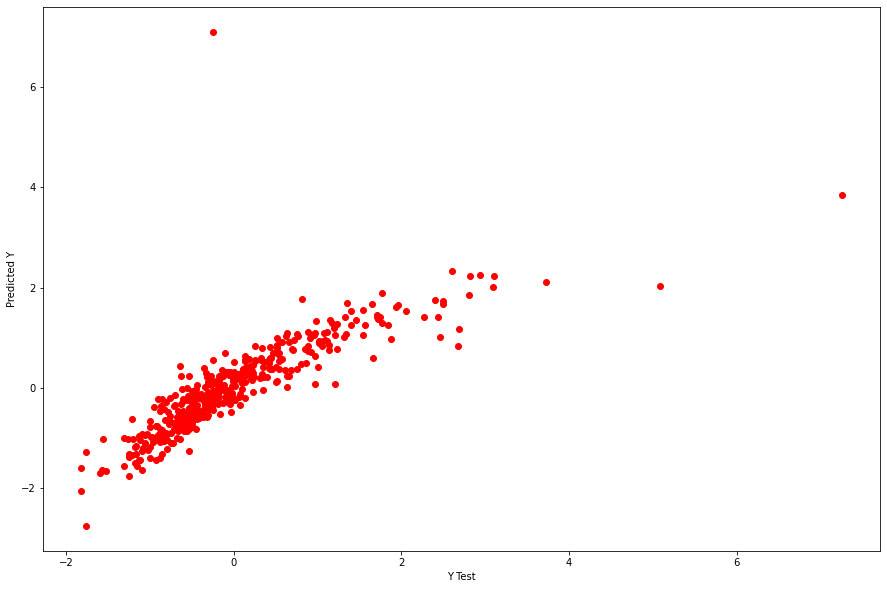

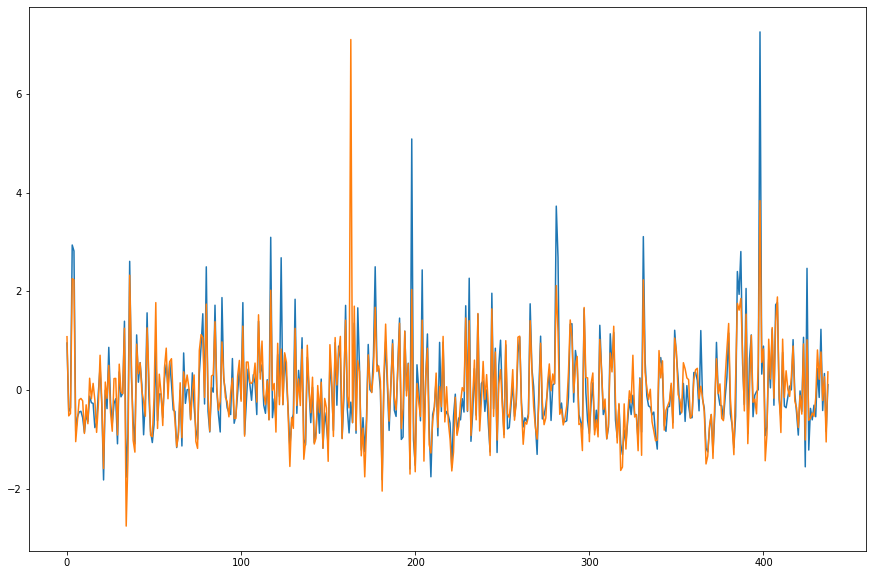

In [27]:
# plotting our linear model based on the predictions 
plt.figure(figsize=(15, 10))
plt.scatter(y_test,predictions, color = 'red')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

# some of the outlying data can be seen that it does not fully predict it as we hoped
plt.figure(figsize=(15, 10))
plt.plot(y_test,label = 'Test Data')
plt.plot(predictions, label = 'Predictions')
plt.show()

The data is fairly linear, where it rises

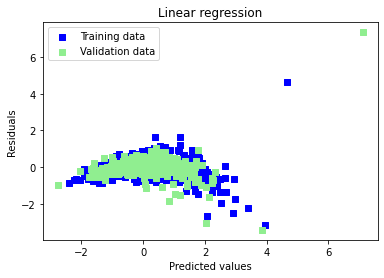

In [28]:
# Testing assumptions further - plotting residuals in a different way
y_train_pred = lm.predict(x_train)

plt.scatter(y_train_pred, y_train_pred - y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(predictions, predictions - y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.show()

https://towardsdatascience.com/what-are-the-best-metrics-to-evaluate-your-regression-model-418ca481755b
A way I used to evaluate the metrics of our predicted values 
derived from this article

In [29]:
print('Mean squared error: ', metrics.mean_squared_error(y_test, predictions))
print('Square root mean squared error: ', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('Mean absolute error: ', metrics.mean_absolute_error(y_test, predictions))

Mean squared error:  0.29995756024517584
Square root mean squared error:  0.5476838141164807
Mean absolute error:  0.29105407971784336


In [30]:
scores = cross_val_score(lm, x_train, y_train,
                         scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)
print("Scores:", rmse_scores)
print("Mean:", rmse_scores.mean())
print("Standard deviation:", rmse_scores.std())

Scores: [0.37919289 0.50562717 0.31491863 0.62473208 0.35770218 0.48368237
 0.49510348 0.35126944 0.32836494 0.38027292]
Mean: 0.42208661126251634
Standard deviation: 0.09496690132189657


The mean squared is good for now, we can do better though

https://scikit-learn.org/stable/modules/ensemble.html

https://datascience.stackexchange.com/questions/61501/what-is-the-difference-between-gradient-descent-and-gradient-boosting-are-they

https://stackoverflow.com/questions/67275792/optimizing-learning-rate-and-number-of-estimators-for-multioutput-gradient-boost

Some links I used to help use "ensemble"

In [31]:
# the parameters I used from the scikit-learn docs example 
parameters = {'n_estimators': 100, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.05, 'loss': 'squared_error'}
boost = ensemble.GradientBoostingRegressor(**parameters)

boost.fit(x_train, y_train.ravel())

GradientBoostingRegressor(learning_rate=0.05, max_depth=4)

Mean absolute error:  0.2300853052575067
Mean squared error:  0.11644719696579724
Square root mean squared error:  0.3412436035529417


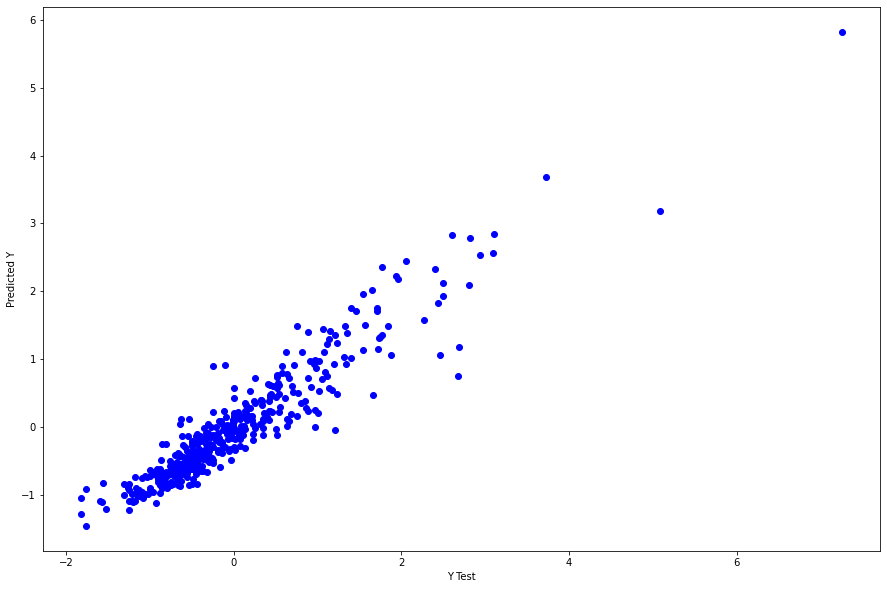

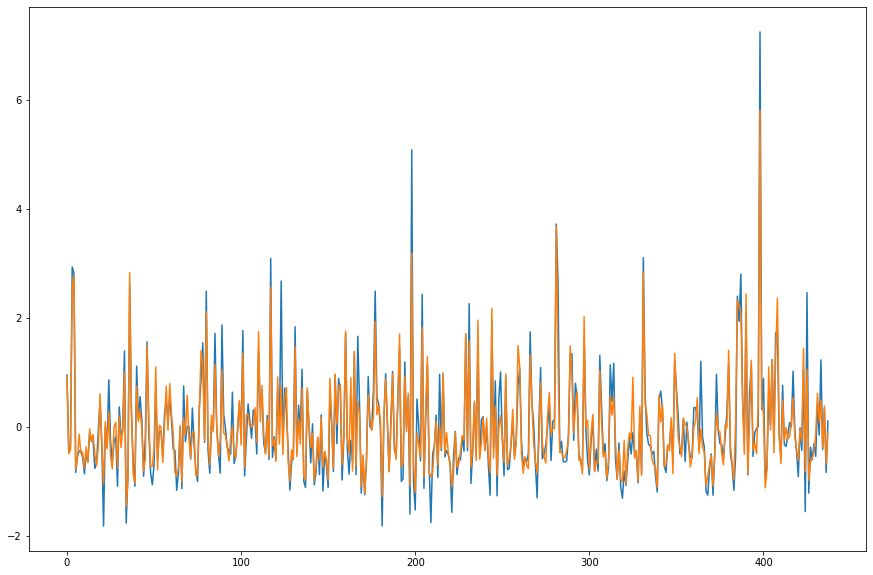

In [32]:
predictions = boost.predict(x_test)
predictions = predictions.reshape(-1,1)

print('Mean absolute error: ', metrics.mean_absolute_error(y_test, predictions))
print('Mean squared error: ', metrics.mean_squared_error(y_test, predictions))
print('Square root mean squared error: ', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

plt.figure(figsize=(15,10))
plt.scatter(y_test, predictions, color = 'blue')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

plt.figure(figsize=(15,10))
plt.plot(y_test,label = 'Test Data')
plt.plot(predictions, label = 'Predictions')
plt.show()

Much better due to better scores offered by mean absolute error, additionally the top graph does not have weird outliers that could sway our results

In [33]:
scores = cross_val_score(boost, x_train, y_train.ravel(),
                         scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)
print("Scores:", rmse_scores)
print("Mean:", rmse_scores.mean())
print("Standard deviation:", rmse_scores.std())

Scores: [0.30332156 0.43398101 0.3088952  0.67745606 0.32858201 0.42122364
 0.51124691 0.34292502 0.28403506 0.36298874]
Mean: 0.3974655188679487
Standard deviation: 0.11476987627568522


In [34]:
test_data_dropped = test_data.copy()
test_data_dropped

,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF
0,5,1961,1961,0.0,468.0,882.0,896,0,896,1,5,0,1961.000000,1.0,730.0,140,0
1,6,1958,1958,108.0,923.0,1329.0,1329,0,1329,1,6,0,1958.000000,1.0,312.0,393,36
2,5,1997,1998,0.0,791.0,928.0,928,701,1629,2,6,1,1997.000000,2.0,482.0,212,34
3,6,1998,1998,20.0,602.0,926.0,926,678,1604,2,7,1,1998.000000,2.0,470.0,360,36
4,8,1992,1992,0.0,263.0,1280.0,1280,0,1280,2,5,0,1992.000000,2.0,506.0,0,82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,4,1970,1970,0.0,0.0,546.0,546,546,1092,1,5,0,1977.721217,0.0,0.0,0,0
1455,4,1970,1970,0.0,252.0,546.0,546,546,1092,1,6,0,1970.000000,1.0,286.0,0,24
1456,5,1960,1996,0.0,1224.0,1224.0,1224,0,1224,1,7,1,1960.000000,2.0,576.0,474,0
1457,5,1992,1992,0.0,337.0,912.0,970,0,970,1,6,0,1977.721217,0.0,0.0,80,32


OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF',
       '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'GarageYrBlt', 'Fireplaces', 'BsmtFinSF1'
       
These are the columns used in the linear regression model, so dropping the unused columns in the test set

In [35]:
test_data_dropped.drop(['2ndFlrSF', 'WoodDeckSF', 
                'OpenPorchSF'], axis=1, inplace=True)



In [36]:
test_data_dropped = scalerX.fit_transform(test_data_dropped)
test_data_dropped

array([[-0.75110125, -0.34094461, -1.07288463, ..., -0.65048832,
        -0.98801273,  1.18594459],
       [-0.05487716, -0.43969491, -1.21490841, ..., -0.76719424,
        -0.98801273, -0.7412126 ],
       [-0.75110125,  0.844059  ,  0.6787419 , ...,  0.74998273,
         0.30162251,  0.04255946],
       ...,
       [-0.75110125, -0.37386137,  0.58405938, ..., -0.6893903 ,
         0.30162251,  0.47593931],
       [-0.75110125,  0.67947517,  0.39469435, ...,  0.        ,
        -2.27764797, -2.17966486],
       [ 0.64134693,  0.71239193,  0.48937687, ...,  0.59437483,
         1.59125775,  0.81711068]])

In [37]:
test_prediction_lm = lm.predict(test_data_dropped)
test_prediction_lm = test_prediction_lm.reshape(-1,1)
test_prediction_lm = scalerY.inverse_transform(test_prediction_lm)
test_prediction_lm = pd.DataFrame(test_prediction_lm, columns=['SalePrice'])
test_prediction_lm.head()

,SalePrice
0,136469.718438
1,146062.762588
2,200572.494637
3,218578.408209
4,218426.912146


In [38]:
test_id = df_test['Id']
ids = pd.DataFrame(test_id, columns=['Id'])
result = pd.concat([ids,test_prediction_lm], axis=1)
result.head()

,Id,SalePrice
0,1461,136469.718438
1,1462,146062.762588
2,1463,200572.494637
3,1464,218578.408209
4,1465,218426.912146


In [39]:
#result.to_csv('submission.csv', index=False)

## Gradient descent submission over linear regression - due to a better means squared error

In [40]:


test_prediction_boost = boost.predict(test_data_dropped)
test_prediction_boost = test_prediction_boost.reshape(-1,1)
test_prediction_boost = scalerY.inverse_transform(test_prediction_boost)
test_prediction_boost = pd.DataFrame(test_prediction_boost, columns=['SalePrice'])
test_prediction_boost.head()



,SalePrice
0,132789.166328
1,149505.381213
2,179563.833531
3,199244.841393
4,210698.431266


In [41]:
test_id = df_test['Id']
ids = pd.DataFrame(test_id, columns=['Id'])
result = pd.concat([ids, test_prediction_boost], axis=1)
result.head()

,Id,SalePrice
0,1461,132789.166328
1,1462,149505.381213
2,1463,179563.833531
3,1464,199244.841393
4,1465,210698.431266


In [42]:
result.to_csv('submission.csv', index=False)